<a href="https://colab.research.google.com/github/aakanksha-1399/Movie-Analysis/blob/master/Movie_Recommendatin_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Movie Recommendation System

In [1]:
from google.colab import drive
drive.mount('/content/drive') 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Cleaning of Data


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
movies = pd.read_excel('/content/drive/My Drive/Movie_Recommendation System/RAW.xlsx')
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(movies)
movies.head(16750)

,Sr.No,Title,Year,Age,IMDb,Directors,Genres,Language,Runtime
0,1,Inception,2010,13+,8.8,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",English,149.0
3,4,Back to the Future,1985,7+,8.5,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",English,116.0
4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,Sergio Leone,Western,Italian,161.0
...,...,...,...,...,...,...,...,...,...
16739,16740,The Ghosts of Buxley Hall,1980,NaN,6.2,Bruce Bilson,"Comedy,Family,Fantasy,Horror",English,120.0
16740,16741,The Poof Point,2001,7+,4.7,Neal Israel,"Comedy,Family,Sci-Fi",English,90.0
16741,16742,Sharks of Lost Island,2013,NaN,5.7,Neil Gelinas,Documentary,English,NaN
16742,16743,Man Among Cheetahs,2017,NaN,6.6,Richard Slater-Jones,Documentary,English,NaN


In [ ]:
print (movies['Title'])
print (movies['Title'].isnull())

0                             Inception
1                            The Matrix
2                Avengers: Infinity War
3                    Back to the Future
4        The Good, the Bad and the Ugly
                      ...              
16739         The Ghosts of Buxley Hall
16740                    The Poof Point
16741             Sharks of Lost Island
16742                Man Among Cheetahs
16743                  In Beaver Valley
Name: Title, Length: 16744, dtype: object
0        False
1        False
2        False
3        False
4        False
         ...  
16739    False
16740    False
16741    False
16742    False
16743    False
Name: Title, Length: 16744, dtype: bool


In [ ]:
missing_values = ["n/a", "na", "--"]
movies =  pd.read_excel("/content/drive/My Drive/Movie_Recommendation System/RAW.xlsx", na_values = missing_values)
print (movies['Title'])
print (movies['Title'].isnull())

0                             Inception
1                            The Matrix
2                Avengers: Infinity War
3                    Back to the Future
4        The Good, the Bad and the Ugly
                      ...              
16739         The Ghosts of Buxley Hall
16740                    The Poof Point
16741             Sharks of Lost Island
16742                Man Among Cheetahs
16743                  In Beaver Valley
Name: Title, Length: 16744, dtype: object
0        False
1        False
2        False
3        False
4        False
         ...  
16739    False
16740    False
16741    False
16742    False
16743    False
Name: Title, Length: 16744, dtype: bool


In [ ]:
print (movies.isnull().sum())

Sr.No           0
Title           0
Year            0
Age          9390
IMDb          571
Directors     726
Genres        275
Language      599
Runtime       592
dtype: int64


In [ ]:
#To delete values null in the column genres
movies=movies[~movies['Genres'].isnull()]
print(movies)

       Sr.No                           Title  ...                 Language Runtime
0          1                       Inception  ...  English,Japanese,French   148.0
1          2                      The Matrix  ...                  English   136.0
2          3          Avengers: Infinity War  ...                  English   149.0
3          4              Back to the Future  ...                  English   116.0
4          5  The Good, the Bad and the Ugly  ...                  Italian   161.0
...      ...                             ...  ...                      ...     ...
16739  16740       The Ghosts of Buxley Hall  ...                  English   120.0
16740  16741                  The Poof Point  ...                  English    90.0
16741  16742           Sharks of Lost Island  ...                  English     NaN
16742  16743              Man Among Cheetahs  ...                  English     NaN
16743  16744                In Beaver Valley  ...                  English    32.0

[16

In [ ]:
print(movies.shape)

(16469, 9)


In [ ]:
print (movies.isnull().sum())

Sr.No           0
Title           0
Year            0
Age          9145
IMDb          397
Directors     480
Genres          0
Language      348
Runtime       353
dtype: int64


In [ ]:
#To remove all and replace it with 0
movies =movies.replace(to_replace="all",value="0")
#movies =movies.replace(to_replace=" ",value="0")
print (movies.isnull().sum())
#To replace null value with 0
movies["Age"] = movies["Age"].fillna(0)

Sr.No          0
Title          0
Year           0
Age            0
IMDb         397
Directors    480
Genres         0
Language     348
Runtime      353
dtype: int64


In [ ]:
#To round the values of IMDB
movies.IMDb = movies.IMDb.round()
#print(movies)
#movies.head()
#To fill in the missing values to an average value 
movies['IMDb'].fillna(value=movies['IMDb'].mean(), inplace=True)
print (movies.isnull().sum())

Sr.No          0
Title          0
Year           0
Age            0
IMDb           0
Directors    480
Genres         0
Language     348
Runtime      353
dtype: int64


In [ ]:
#null director write down: Director Not Known
movies["Directors"] = movies["Directors"].fillna("Director Not Known")
print (movies.isnull().sum())

Sr.No          0
Title          0
Year           0
Age            0
IMDb           0
Directors      0
Genres         0
Language     348
Runtime      353
dtype: int64


In [ ]:
#Language replace null with english
movies["Language"] = movies["Language"].fillna("English")
print (movies.isnull().sum())

Sr.No          0
Title          0
Year           0
Age            0
IMDb           0
Directors      0
Genres         0
Language       0
Runtime      353
dtype: int64


In [ ]:
#Runntime average time
movies['Runtime'].fillna(value=movies['Runtime'].mean(), inplace=True)
print (movies.isnull().sum())

Sr.No        0
Title        0
Year         0
Age          0
IMDb         0
Directors    0
Genres       0
Language     0
Runtime      0
dtype: int64


In [ ]:
pip install xlsxwriter

     |████████████████████████████████| 143kB 4.5MB/s 


In [ ]:
#Clean_Movies_Data = pd.ExcelWriter('/content/drive/My Drive/Movie_Recommendation System/MOVIE RECOMMENDATION/Data1.xlsx')
#Clean_Movies_Data.save()
import xlsxwriter
Clean_Movies_Data = pd.ExcelWriter('/content/drive/My Drive/Movie_Recommendation System/Clean_Movies_Data.xlsx',engine = 'xlsxwriter')
movies.to_excel('/content/drive/My Drive/Movie_Recommendation System/Clean_Movies_Data.xlsx', sheet_name='sheet1')


#Binning of Data


In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/drive/My Drive/Movie_Recommendation System/Output.xlsx')
df.head()

,Sr.No,Title,Year,Age,IMDb,Directors,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genres 6,Genre 7,Genre 8,Genre 9,Language,Runtime
0,1,Inception,2010,13,9.0,Christopher Nolan,Action,Adventure,Sci-Fi,Thriller,NaN,NaN,NaN,NaN,NaN,"English,Japanese,French",148.0
1,2,The Matrix,1999,18,9.0,"Lana Wachowski,Lilly Wachowski",Action,Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,136.0
2,3,Avengers: Infinity War,2018,13,8.0,"Anthony Russo,Joe Russo",Action,Adventure,Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,English,149.0
3,4,Back to the Future,1985,7,8.0,Robert Zemeckis,Adventure,Comedy,Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,13,9.0,Sergio Leone,Western,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italian,161.0


In [ ]:
#convert string to integer
df['Age'] = pd.to_numeric(df['Age'])
df.head()

,Sr.No,Title,Year,Age,IMDb,Directors,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genres 6,Genre 7,Genre 8,Genre 9,Language,Runtime
0,1,Inception,2010,13,9.0,Christopher Nolan,Action,Adventure,Sci-Fi,Thriller,NaN,NaN,NaN,NaN,NaN,"English,Japanese,French",148.0
1,2,The Matrix,1999,18,9.0,"Lana Wachowski,Lilly Wachowski",Action,Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,136.0
2,3,Avengers: Infinity War,2018,13,8.0,"Anthony Russo,Joe Russo",Action,Adventure,Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,English,149.0
3,4,Back to the Future,1985,7,8.0,Robert Zemeckis,Adventure,Comedy,Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,English,116.0
4,5,"The Good, the Bad and the Ugly",1966,13,9.0,Sergio Leone,Western,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italian,161.0


In [ ]:
#Bining of Data
bins = [0,7,13,18,90]
labels = [1,2,3,4]
df['binned'] = pd.cut(df['Age'], bins=bins, labels=labels)
df.head(100)

,Sr.No,Title,Year,Age,IMDb,Directors,Genre 1,Genre 2,Genre 3,Genre 4,Genre 5,Genres 6,Genre 7,Genre 8,Genre 9,Language,Runtime,binned
0,1,Inception,2010,13,9.0,Christopher Nolan,Action,Adventure,Sci-Fi,Thriller,NaN,NaN,NaN,NaN,NaN,"English,Japanese,French",148.0,2
1,2,The Matrix,1999,18,9.0,"Lana Wachowski,Lilly Wachowski",Action,Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,English,136.0,3
2,3,Avengers: Infinity War,2018,13,8.0,"Anthony Russo,Joe Russo",Action,Adventure,Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,English,149.0,2
3,4,Back to the Future,1985,7,8.0,Robert Zemeckis,Adventure,Comedy,Sci-Fi,NaN,NaN,NaN,NaN,NaN,NaN,English,116.0,1
4,5,"The Good, the Bad and the Ugly",1966,13,9.0,Sergio Leone,Western,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Italian,161.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Saving Mr. Banks,2013,13,8.0,John Lee Hancock,Biography,Comedy,Drama,NaN,NaN,NaN,NaN,NaN,NaN,English,125.0,2
96,97,Icarus,2017,18,8.0,Bryan Fogel,Documentary,Sport,Thriller,NaN,NaN,NaN,NaN,NaN,NaN,"English,Russian",120.0,3
97,98,Jiro Dreams of Sushi,2011,13,8.0,David Gelb,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Japanese,81.0,2
98,99,Corpse Bride,2005,7,7.0,"Tim Burton,Mike Johnson",Animation,Drama,Family,Fantasy,Musical,Romance,NaN,NaN,NaN,English,77.0,1


In [ ]:
#TO find all the genres available
column_values = df[["Genre 1","Genre 2","Genre 3","Genre 4","Genre 5","Genres 6","Genre 7","Genre 8","Genre 9"]].values.ravel()
unique_values =  pd.unique(column_values)
print(unique_values)

['Action' 'Adventure' 'Sci-Fi' 'Thriller' nan 'Comedy' 'Western'
 'Animation' 'Family' 'Biography' 'Drama' 'Music' 'War' 'Crime' 'Fantasy'
 'Romance' 'History' 'Mystery' 'Horror' 'Sport' 'Documentary' 'Musical'
 'News' 'Short' 'Reality-TV' 'Talk-Show' 'Game-Show' 'Film-Noir']


In [ ]:
df.rename(columns={'Genres 6':'Genre 6'}, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f83110ddcc0>]],
      dtype=object)

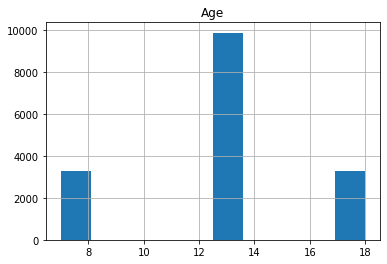

In [ ]:
#histogram for age
df.hist(column='Age')

In [ ]:
#To categorise movies on basis of their genres

In [ ]:
pip install xlsxwriter

     |████████████████████████████████| 153kB 3.4MB/s 


In [ ]:
import xlsxwriter
Binned_Movies_Data = pd.ExcelWriter('/content/drive/My Drive/Movie_Recommendation System/Binned_Movies_Data.xlsx',engine = 'xlsxwriter')
df.to_excel('/content/drive/My Drive/Movie_Recommendation System/Binned_Movies_Data.xlsx', sheet_name='sheet1')

Tableau Visualisation 
[link text](https://public.tableau.com/profile/aakanksha.padmanabhan)